[INFO] Generating ExponentialNoise M4 T200 I0 with seed=1002174316...
[INFO] Generating ExponentialNoise M4 T400 I0 with seed=1592340899...
[INFO] Generating ExponentialNoise M8 T200 I0 with seed=1698815221...
[INFO] Generating ExponentialNoise M8 T400 I0 with seed=1491577172...


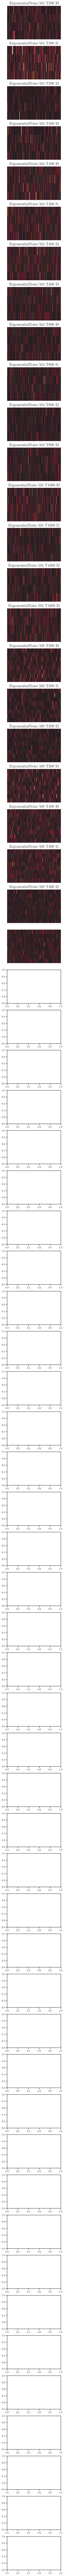

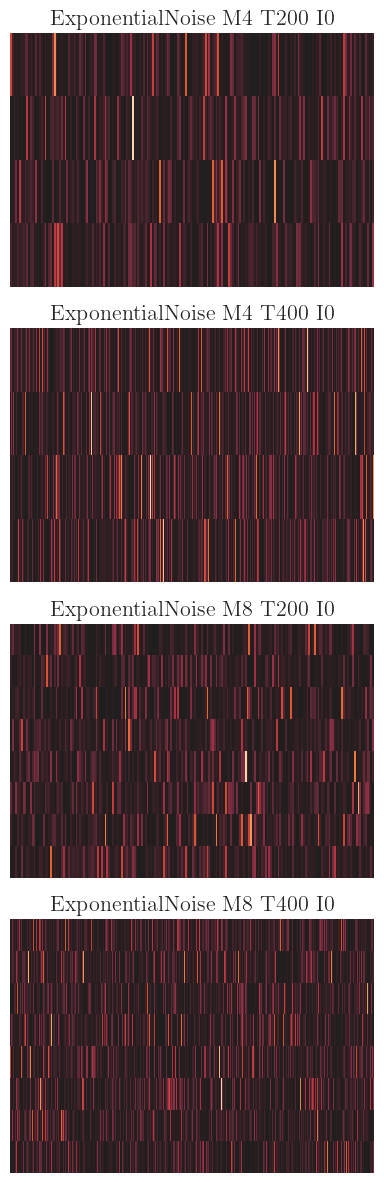

In [ ]:
import pathlib, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from src.mapping import ExperimentConfig, DatasetMapping
import importlib
import src.generate
importlib.reload(src.generate)
from src import generate

config_path = pathlib.Path("configs/experiments_full_4.yaml")  # change if needed
target_class = "ExponentialNoise"  # set class to preview
seed_override = None  # set an int to force a custom seed for all previews

cfg = ExperimentConfig.from_file(config_path)
mapping = DatasetMapping(cfg)

specs = [s for s in mapping.specs if s.mts_class == target_class]
if not specs:
    raise SystemExit(f"No specs for class {target_class}")

n = len(specs)
cols = min(4, n)
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows), squeeze=False)

for ax, spec in zip(axes.ravel(), specs):
    seed = seed_override if seed_override is not None else spec.rng_seed
    params = dict(spec.generator_params)
    if spec.generator == "cml_logistic":
        params["delta"] = 3
    print(f"[INFO] Generating {spec.mts_class} M{spec.M} T{spec.T} I{spec.instance} with seed={seed}...")
    ts = generate.generate_series(
        spec.generator,
        seed=seed,
        M=spec.M,
        T=spec.T,
        **params,
    )
    sns.heatmap(ts.T, cmap="icefire", ax=ax, cbar=False,
                xticklabels=False, yticklabels=False, center=0)
    ax.set_title(f"{spec.mts_class} M{spec.M} T{spec.T} I{spec.instance}")
for ax in axes.ravel()[len(specs):]:
    ax.axis("off")
fig.tight_layout()
plt.show()


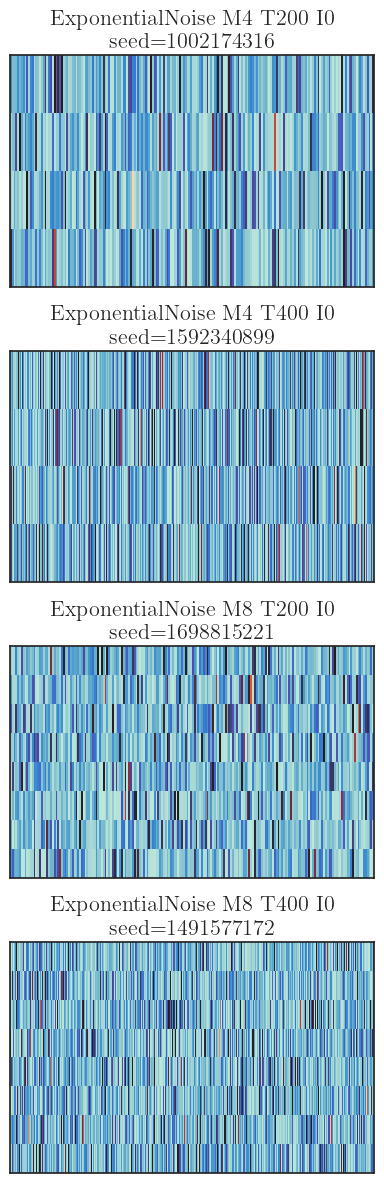

In [18]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from src.mapping import ExperimentConfig, DatasetMapping
import importlib
import src.generate
importlib.reload(src.generate)
from src import generate
from src.plot_style import apply_plot_style

config_path = pathlib.Path("configs/experiments_full_4.yaml")
target_class = "ExponentialNoise"  # set class to preview)"
seed_override = None # set to int to force a custom seed

cfg = ExperimentConfig.from_file(config_path)
mapping = DatasetMapping(cfg)
specs = [s for s in mapping.specs if s.mts_class == target_class]
if not specs:
    raise SystemExit(f"No specs for class {target_class}")

n = len(specs)
cols = min(1, n)
rows = (n + cols - 1) // cols
apply_plot_style()
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows), squeeze=False)

for ax, spec in zip(axes.ravel(), specs):
    seed = seed_override if seed_override is not None else spec.rng_seed
    params = dict(spec.generator_params) # use config as-is (matches cluster)
    ts = generate.generate_series(
    spec.generator,
    seed=seed,
    M=spec.M,
    T=spec.T,
    **params,
    )

    data = ts.T if ts.shape[0] > ts.shape[1] else ts # show as M rows x T cols

    ax.pcolormesh(
    data,
    shading="flat",
    # vmin=-3,
    # vmax=3,
    cmap="icefire",
    )

    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{spec.mts_class} M{spec.M} T{spec.T} I{spec.instance}\nseed={seed}")

    for ax in axes.ravel()[n:]:
        ax.axis("off")

fig.tight_layout()
plt.show()